In [76]:
# Import libraries
import pandas as pd
import sklearn.decomposition as decom
import sk
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter

In [45]:
# Read in raw data
df = pd.read_csv("../text-mining-project-data/clean/count-500.csv")
df.sample(10)

,labels,able,access,accused,act,action,activists,actually,added,administration,...,worked,working,world,wounded,wrote,year,years,york,young,youre
560,right,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,3,0,0,0
2097,left,0,0,0,2,4,3,1,1,0,...,0,0,0,0,0,2,0,0,0,0
2501,left,1,2,0,1,3,0,2,2,0,...,0,0,1,0,2,5,4,0,2,3
1623,right,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1611,right,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,2,1,0
2187,left,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,1,0,0
2386,left,1,0,0,0,4,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1791,left,0,0,0,1,0,0,0,1,1,...,0,2,2,0,0,1,0,1,0,0
2613,left,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,0
1952,left,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,2,1,2,0,0


In [7]:
# Save labels for later (if we need them)
labels = df["labels"]
df_data = df.drop("labels", axis=1)

In [46]:
# Run LDA on dataset. Use 5 topics
lda_model = decom.LatentDirichletAllocation(n_components=5)
lda_df = lda_model.fit_transform(df_data)

In [11]:
lda_df = lda_model.transform(df_data)

In [20]:
def print_topics(model, feature_names, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(feature_names, topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])

In [21]:
print_topics(lda_model, df_data)

Topic 0:
[(      aaron  abandoned  abbott  abc  abiding  ability  able  abortion  abroad  \
0         0          0       0    0        0        0     1         0       0   
1         0          0       0    0        0        0     0         0       0   
2         0          0       0    0        0        0     0         0       0   
3         0          0       0    0        0        0     0         0       0   
4         0          0       0    0        0        0     0         0       0   
...     ...        ...     ...  ...      ...      ...   ...       ...     ...   
2620      0          0       0    0        0        0     0         0       0   
2621      0          0       0    0        0        0     0         0       0   
2622      0          0       0    0        0        0     0         0       0   
2623      0          0       0    0        1        0     0         0       0   
2624      0          0       0    0        0        1     0         0       0   

      absence  .

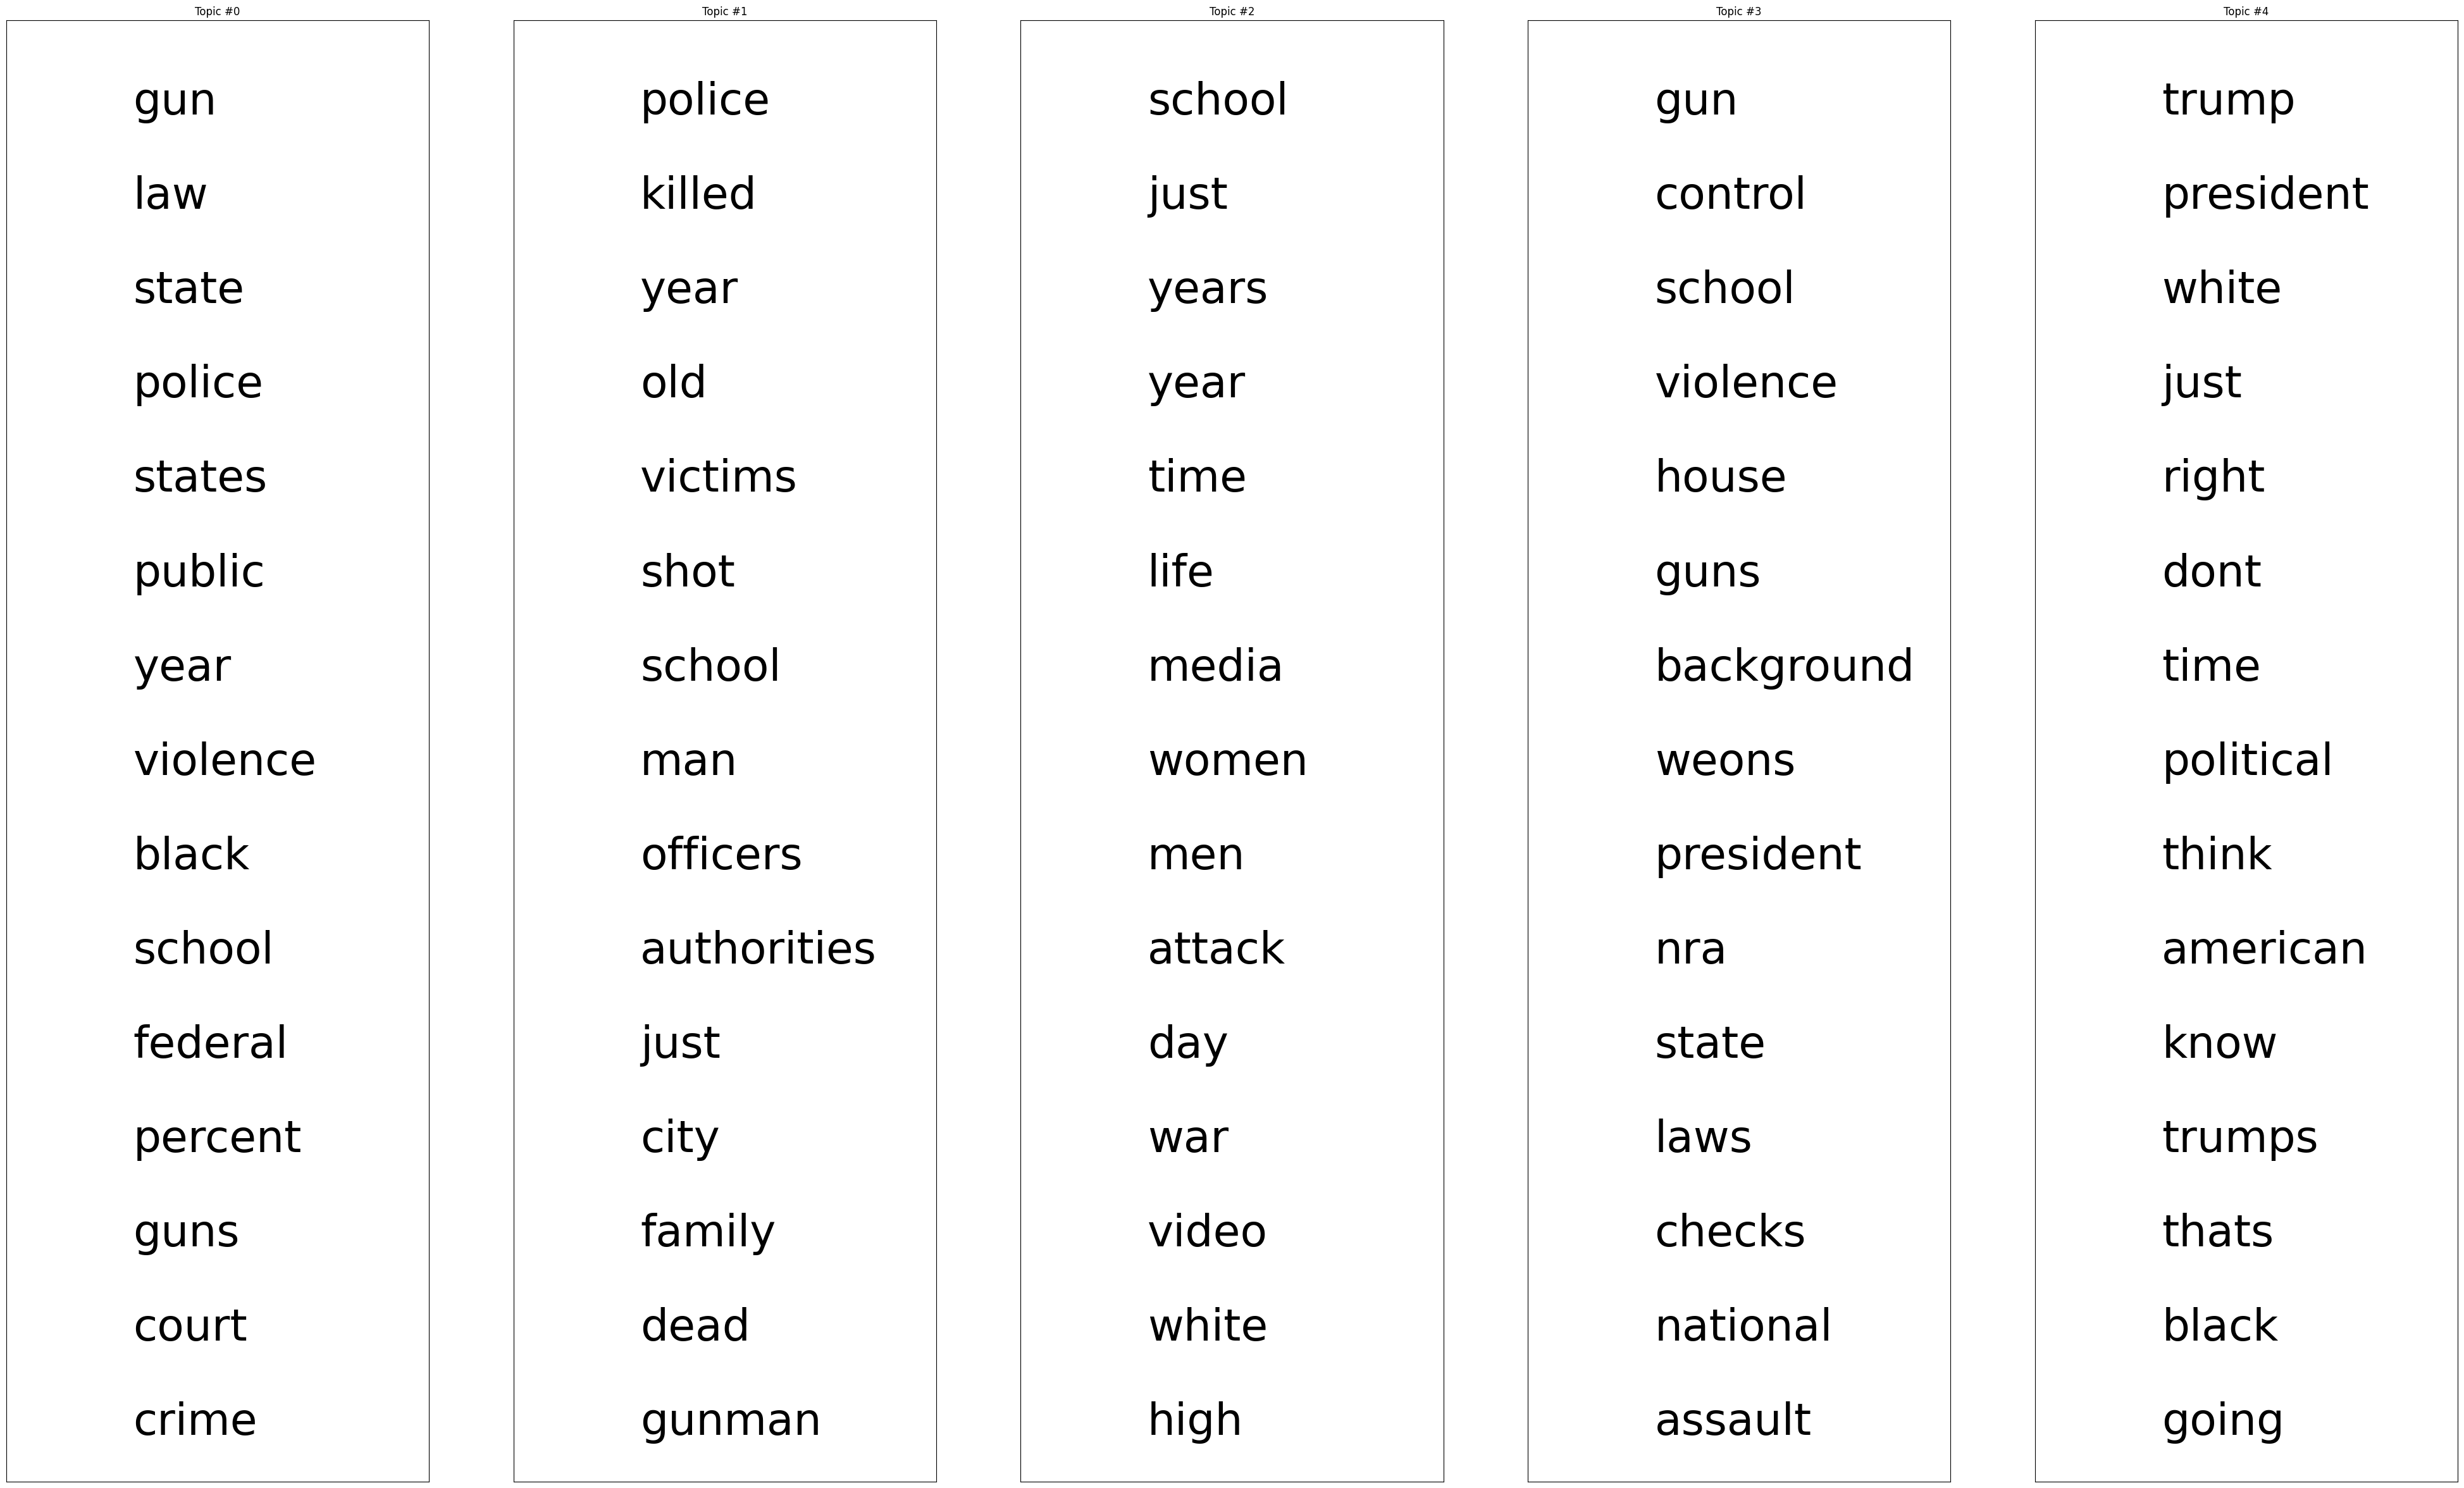

In [47]:
plt.figure(figsize=(50,30))
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(df_data.columns)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 100

NUM_TOPICS = 5

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


# plt.savefig("TopicsVis.pdf")
plt.show()

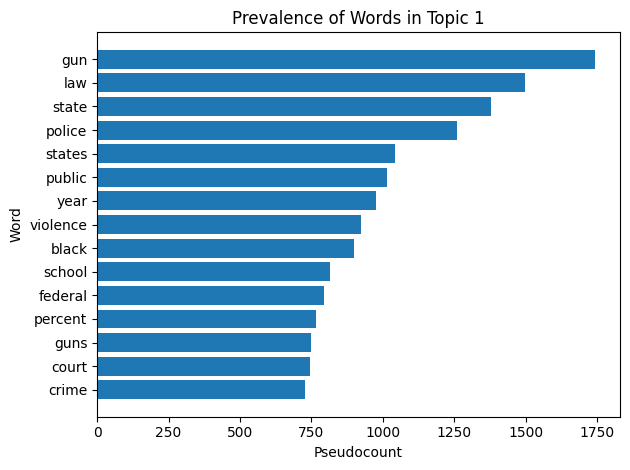

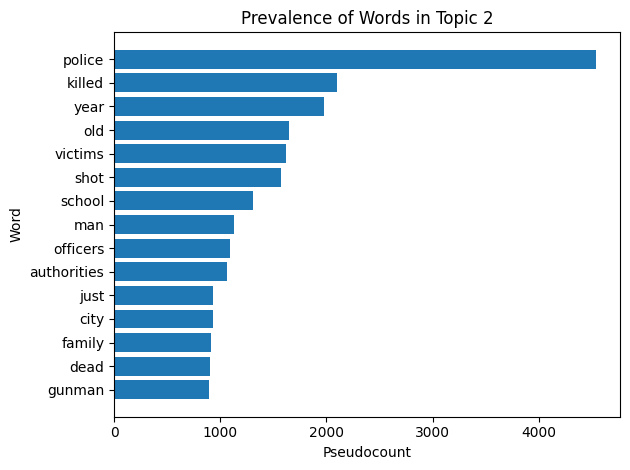

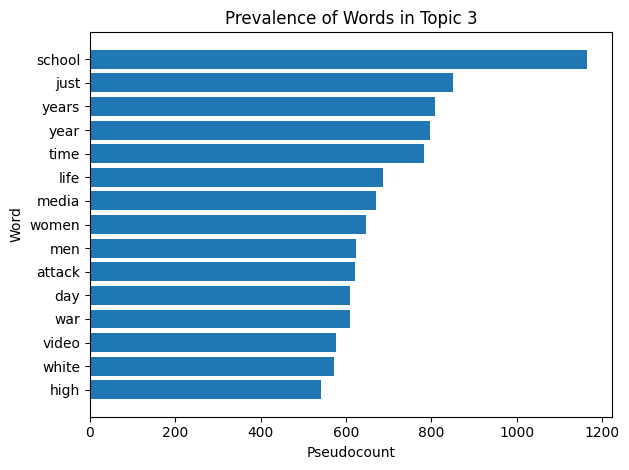

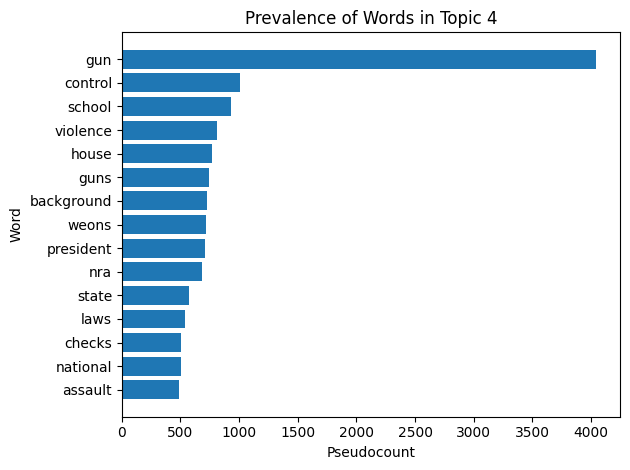

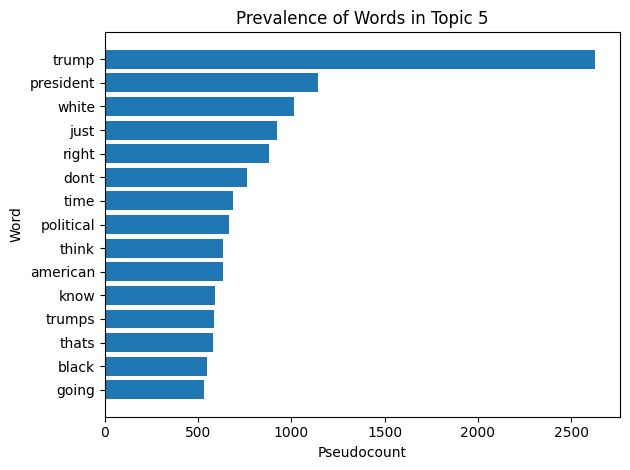

In [99]:
for i in range(5):
    topic_1 = lda_model.components_[i]
    topic_1_sorted = topic_1.argsort()[::-1]
    top_15_sorted = topic_1_sorted[:15]
    vocab_array = np.asarray(df_data.columns)
    top_15 = topic_1[top_15_sorted]
    top_15_words = vocab_array[top_15_sorted]
    plt.title(f"Prevalence of Words in Topic {i + 1}")
    plt.xlabel("Pseudocount")
    plt.ylabel("Word")
    plt.barh(top_15_words[::-1], top_15[::-1])
    plt.tight_layout()
    plt.savefig(f"lda-prevalence-{i+1}.png")
    plt.show()

In [23]:
pickled_lda = pickle.dumps(lda_model)

In [24]:
with open("lda-5comp-lem-tfidf-100.pkl", "wb") as f:
    pickle.dump(lda_model, f)

In [25]:
lda_model.get_feature_names_out()

array(['latentdirichletallocation0', 'latentdirichletallocation1',
       'latentdirichletallocation2', 'latentdirichletallocation3',
       'latentdirichletallocation4'], dtype=object)

In [26]:
lda_df

array([[0.50595406, 0.00332207, 0.4840541 , 0.00339717, 0.0032726 ],
       [0.65822119, 0.00312307, 0.0919422 , 0.20328523, 0.04342831],
       [0.20046467, 0.50207361, 0.29071315, 0.00335314, 0.00339543],
       ...,
       [0.13966329, 0.39436858, 0.00142044, 0.1236037 , 0.340944  ],
       [0.0016555 , 0.53713914, 0.00164777, 0.00172132, 0.45783627],
       [0.00113216, 0.3937857 , 0.04081201, 0.00112792, 0.56314221]])

In [27]:
articles = pd.read_csv("../text-mining-project-data/dirty/reduced-raw-article-data.csv")

In [111]:
def get_docs_out(lda_out, labels_, articles_, num_topics=5, num_top_docs=5):

    for topic in range(num_topics):
        print("###")
        print(f"Topic {topic + 1}:")
        top_docs = lda_out[:,topic].argsort()[-num_topics:]
        for i in range(num_top_docs):
            print(f"{articles_.iloc[top_docs[num_top_docs-1-i]]['url']}")
        print("###")

In [29]:
# Run LDA on dataset. Use 10 topics
lda_model_2 = decom.LatentDirichletAllocation(n_components=10, max_iter=100)

In [30]:
lda_df = lda_model_2.fit_transform(df_data)

KeyboardInterrupt: 

In [100]:
right_df = pd.concat((df, articles), axis=1)
# right_df = right_df[right_df["labels"] == "left"]
right_labels = right_df["labels"]
right_df = right_df.drop("labels", axis=1)
right_articles = right_df[["url", "title", "content"]]
right_df = right_df.drop(["url", "title", "content"], axis=1)

2594.9178776963245
2397.1384085163813
2315.6565615974746
2245.3254595139947
2202.319656712145
2182.44942585121
2155.000975855924
2138.21096720195
2135.2754819108072
2132.791050220852


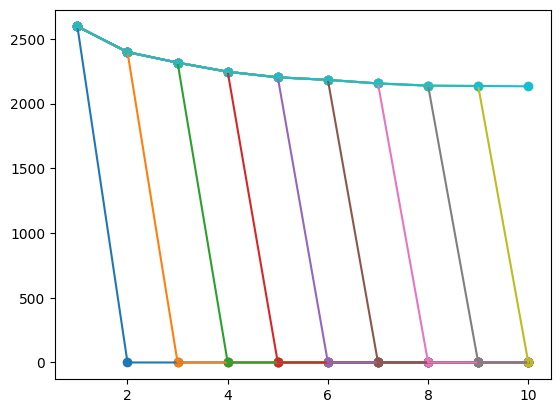

In [34]:
perplexities = np.zeros(10)
t = np.arange(1, 11)

for i in range(10):
    
    lda_model_3 = decom.LatentDirichletAllocation(n_components=i+1)
    lda_model_3.fit(right_df)
    perplexities[i] = lda_model_3.perplexity(right_df)
    print(perplexities[i])
    plt.plot(t, perplexities)
    plt.scatter(t, perplexities)

plt.show()

In [35]:
lda_model_3 = decom.LatentDirichletAllocation(n_components=5)
lda_df_out = lda_model.fit_transform(right_df)

In [112]:
get_docs_out(lda_df_out, right_labels, right_articles, num_top_docs=10)

###
Topic 1:


IndexError: index 9 is out of bounds for axis 0 with size 5

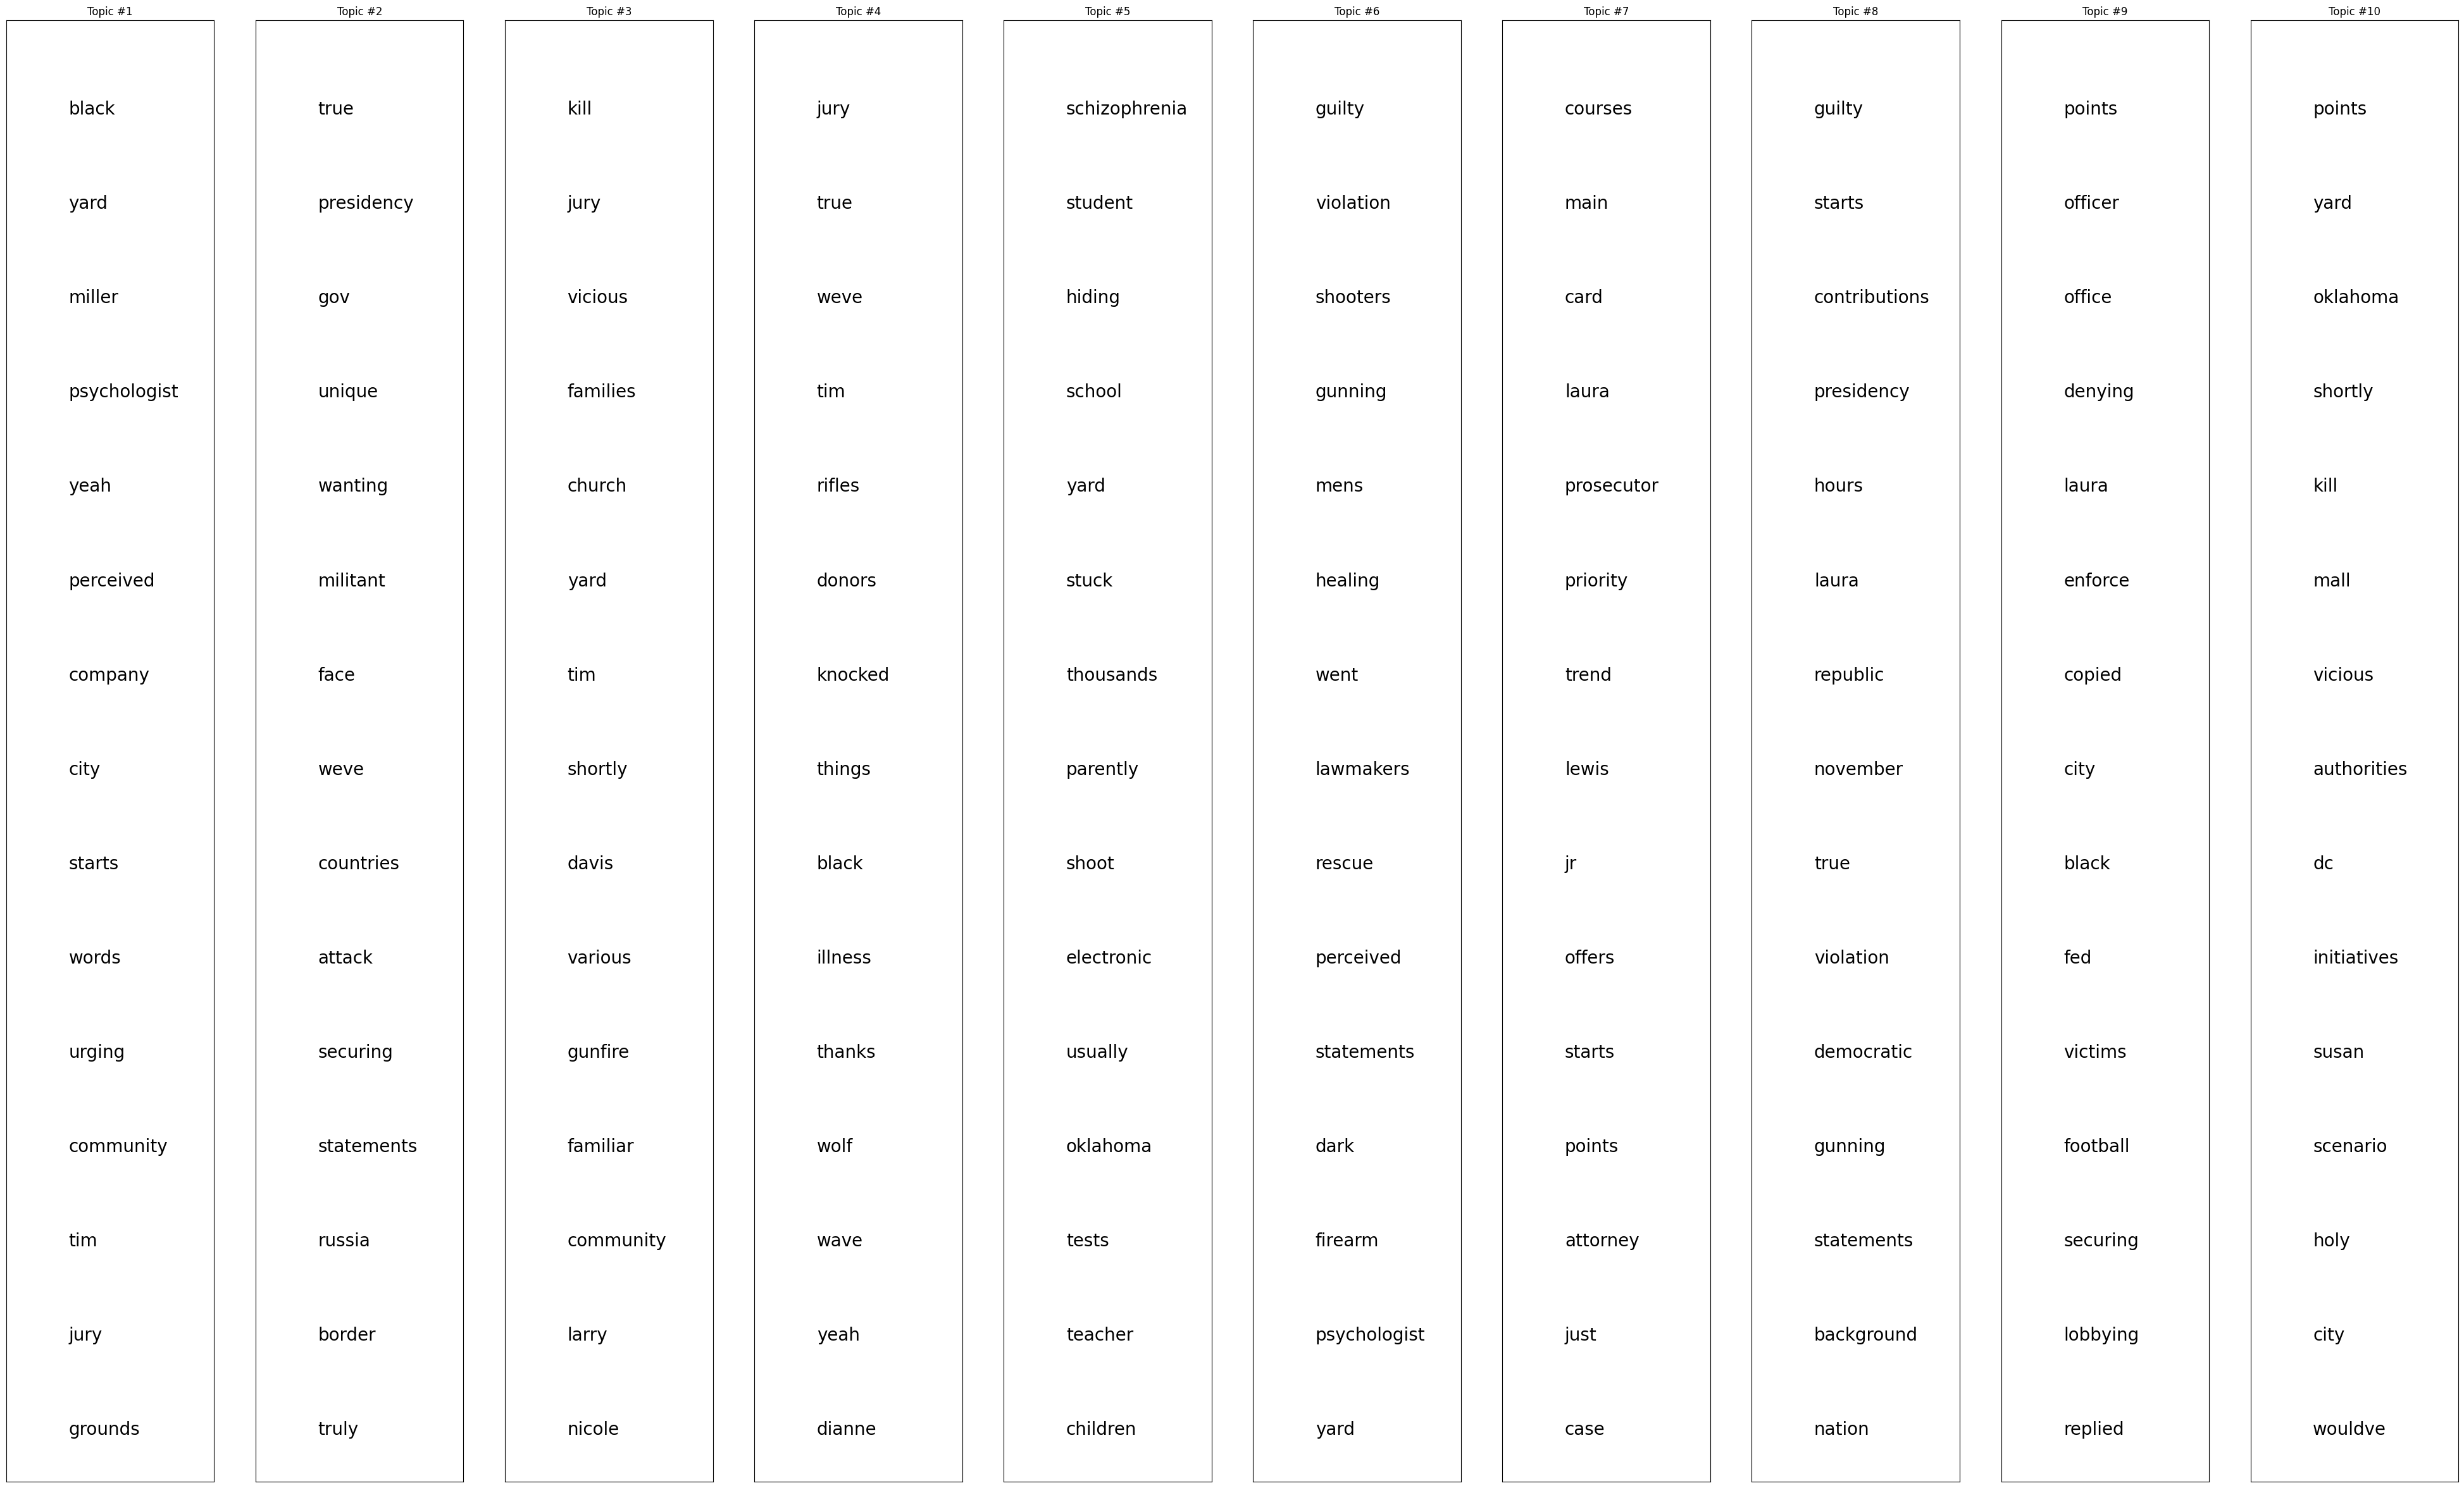

In [362]:
plt.figure(figsize=(50,30))
word_topic = np.array(lda_model_3.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(df_data.columns)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 40

NUM_TOPICS = 5

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


plt.savefig("TopicsVis.pdf")
plt.show()

In [293]:
normed = lda_model_3.components_ / lda_model_3.components_.sum(axis=1)[:, np.newaxis]

array([0.01690726, 0.01242645, 0.00403382, 0.00686295, 0.00981366,
       0.00542265, 0.00304061, 0.00886591, 0.00773263, 0.00722814,
       0.00570829, 0.01884697, 0.00508965, 0.00450074, 0.00416309,
       0.01167375, 0.00575288, 0.00628102, 0.00867419, 0.00489931,
       0.00654098, 0.00544745, 0.00590905, 0.00949172, 0.01059496,
       0.00101114, 0.00770097, 0.02044144, 0.01932301, 0.00965867,
       0.03311061, 0.00406027, 0.00407368, 0.00451098, 0.00549135,
       0.01862698, 0.00424013, 0.01010448, 0.01122511, 0.00660871,
       0.00327993, 0.00773383, 0.00653001, 0.0095639 , 0.00724289,
       0.0104743 , 0.00675372, 0.0067483 , 0.00786542, 0.00898982,
       0.00462496, 0.01076529, 0.01247501, 0.01226375, 0.01494334,
       0.00810411, 0.01233632, 0.00566868, 0.00747366, 0.00228946,
       0.00967538, 0.00399809, 0.02086563, 0.00693251, 0.00540954,
       0.0177714 , 0.04015282, 0.00810582, 0.00774859, 0.02273626,
       0.01987573, 0.00660754, 0.00427954, 0.0046527 , 0.00221

In [321]:
np.round(lda_df_out[0], 2)

array([0.02, 0.02, 0.14, 0.02, 0.02, 0.02, 0.71, 0.02, 0.02, 0.02])